###### loading data tutorial: https://www.youtube.com/watch?v=WvoLTXIjBYU&list=PLQVvvaa0QuDfhTox0AjmQ6tvTgMBZBEXN&index=3
###### mobilenet/transfer learning tutorial: https://deeplizard.com/learn/video/FNqp4ZY0wDY
###### and https://www.youtube.com/watch?v=FNqp4ZY0wDY
###### general transfer learning tutorial: https://www.youtube.com/watch?v=WJZoywOG1cs

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!pip install tflite-model-maker

In [8]:
import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow_examples.lite.model_maker.core.data_util.image_dataloader import ImageClassifierDataLoader
from tensorflow_examples.lite.model_maker.core.task import image_classifier
from tensorflow_examples.lite.model_maker.core.task.model_spec import mobilenet_v2_spec
from tensorflow_examples.lite.model_maker.core.task.model_spec import ImageModelSpec

import matplotlib.pyplot as plt


In [9]:
DATADIR = "/content/drive/MyDrive/EML/Guitar_Chord_Data_Set/test_phone"
CATEGORIES = ["C","D","Em"]

#DATADIR = "/content/drive/MyDrive/EML/Sign_Language_Dataset"
#CATEGORIES = ["0","1","2", "3", "4", "5", "6", "7", "8", "9"]
print("Number of Categories:", len(CATEGORIES))

Number of Categories: 3


In [10]:
image_path = DATADIR

data = ImageClassifierDataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 527, num_label: 5, labels: C, D, Em, F, G.


In [11]:
from tflite_model_maker import model_spec
model = image_classifier.create(train_data, model_spec=model_spec.mobilenet_v2_spec, epochs = 10, use_augmentation=True)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________
None
INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


Epoch 1/10
14/14 [==============================] - 76s 5s/step - loss: 1.2429 - accuracy: 0.5326
Epoch 2/10
14/14 [==============================] - 24s 1s/step - loss: 0.9092 - accuracy: 0.7899
Epoch 3/10
14/14 [==============================] - 20s 1s/step - loss: 0.7565 - accuracy: 0.8210
Epoch 4/10
14/14 [==============================] - 20s 1s/step - loss: 0.6640 - accuracy: 0.8784
Epoch 5/10
14/14 [==============================] - 20s 1s/step - loss: 0.6031 - accuracy: 0.9080
Epoch 6/10
14/14 [==============================] - 20s 1s/step - loss: 0.6091 - accuracy: 0.9048
Epoch 7/10
14/14 [==============================] - 20s 1s/step - loss: 0.5789 - accuracy: 0.9167
Epoch 8/10
14/14 [==============================] - 20s 1s/step - loss: 0.5588 - accuracy: 0.9317
Epoch 9/10
14/14 [==============================] - 20s 1s/step - loss: 0.6233 - accuracy: 0.8797
Epoch 10/10
14/14 [==============================] - 20s 1s/step - loss: 0.5265 - accuracy: 0.9650


In [12]:
loss, accuracy = model.evaluate(test_data)

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


2/2 [==============================] - 13s 3s/step - loss: 0.4697 - accuracy: 1.0000


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


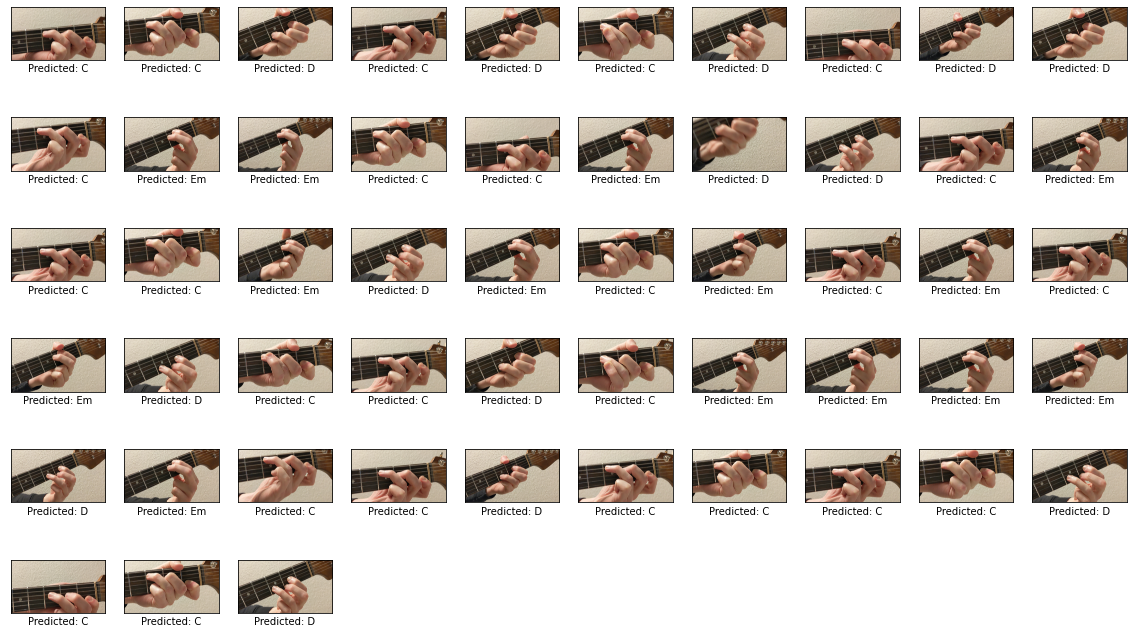

In [13]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()


In [14]:
model.export(export_dir='.', with_metadata=True)

INFO:tensorflow:Assets written to: /tmp/tmpriwuudhf/assets


INFO:tensorflow:Assets written to: /tmp/tmpriwuudhf/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpncrx9v1n/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmpncrx9v1n/labels.txt.
